# API / Website 

- Please note that we also created a dash app on a separate jupyter file

### Import the necessary libraries

- Pandas to create a data frame and store data
- Flask is used to create the Website and API
- Request to make "requests" about a particular website
- Json to manipulate the API returns

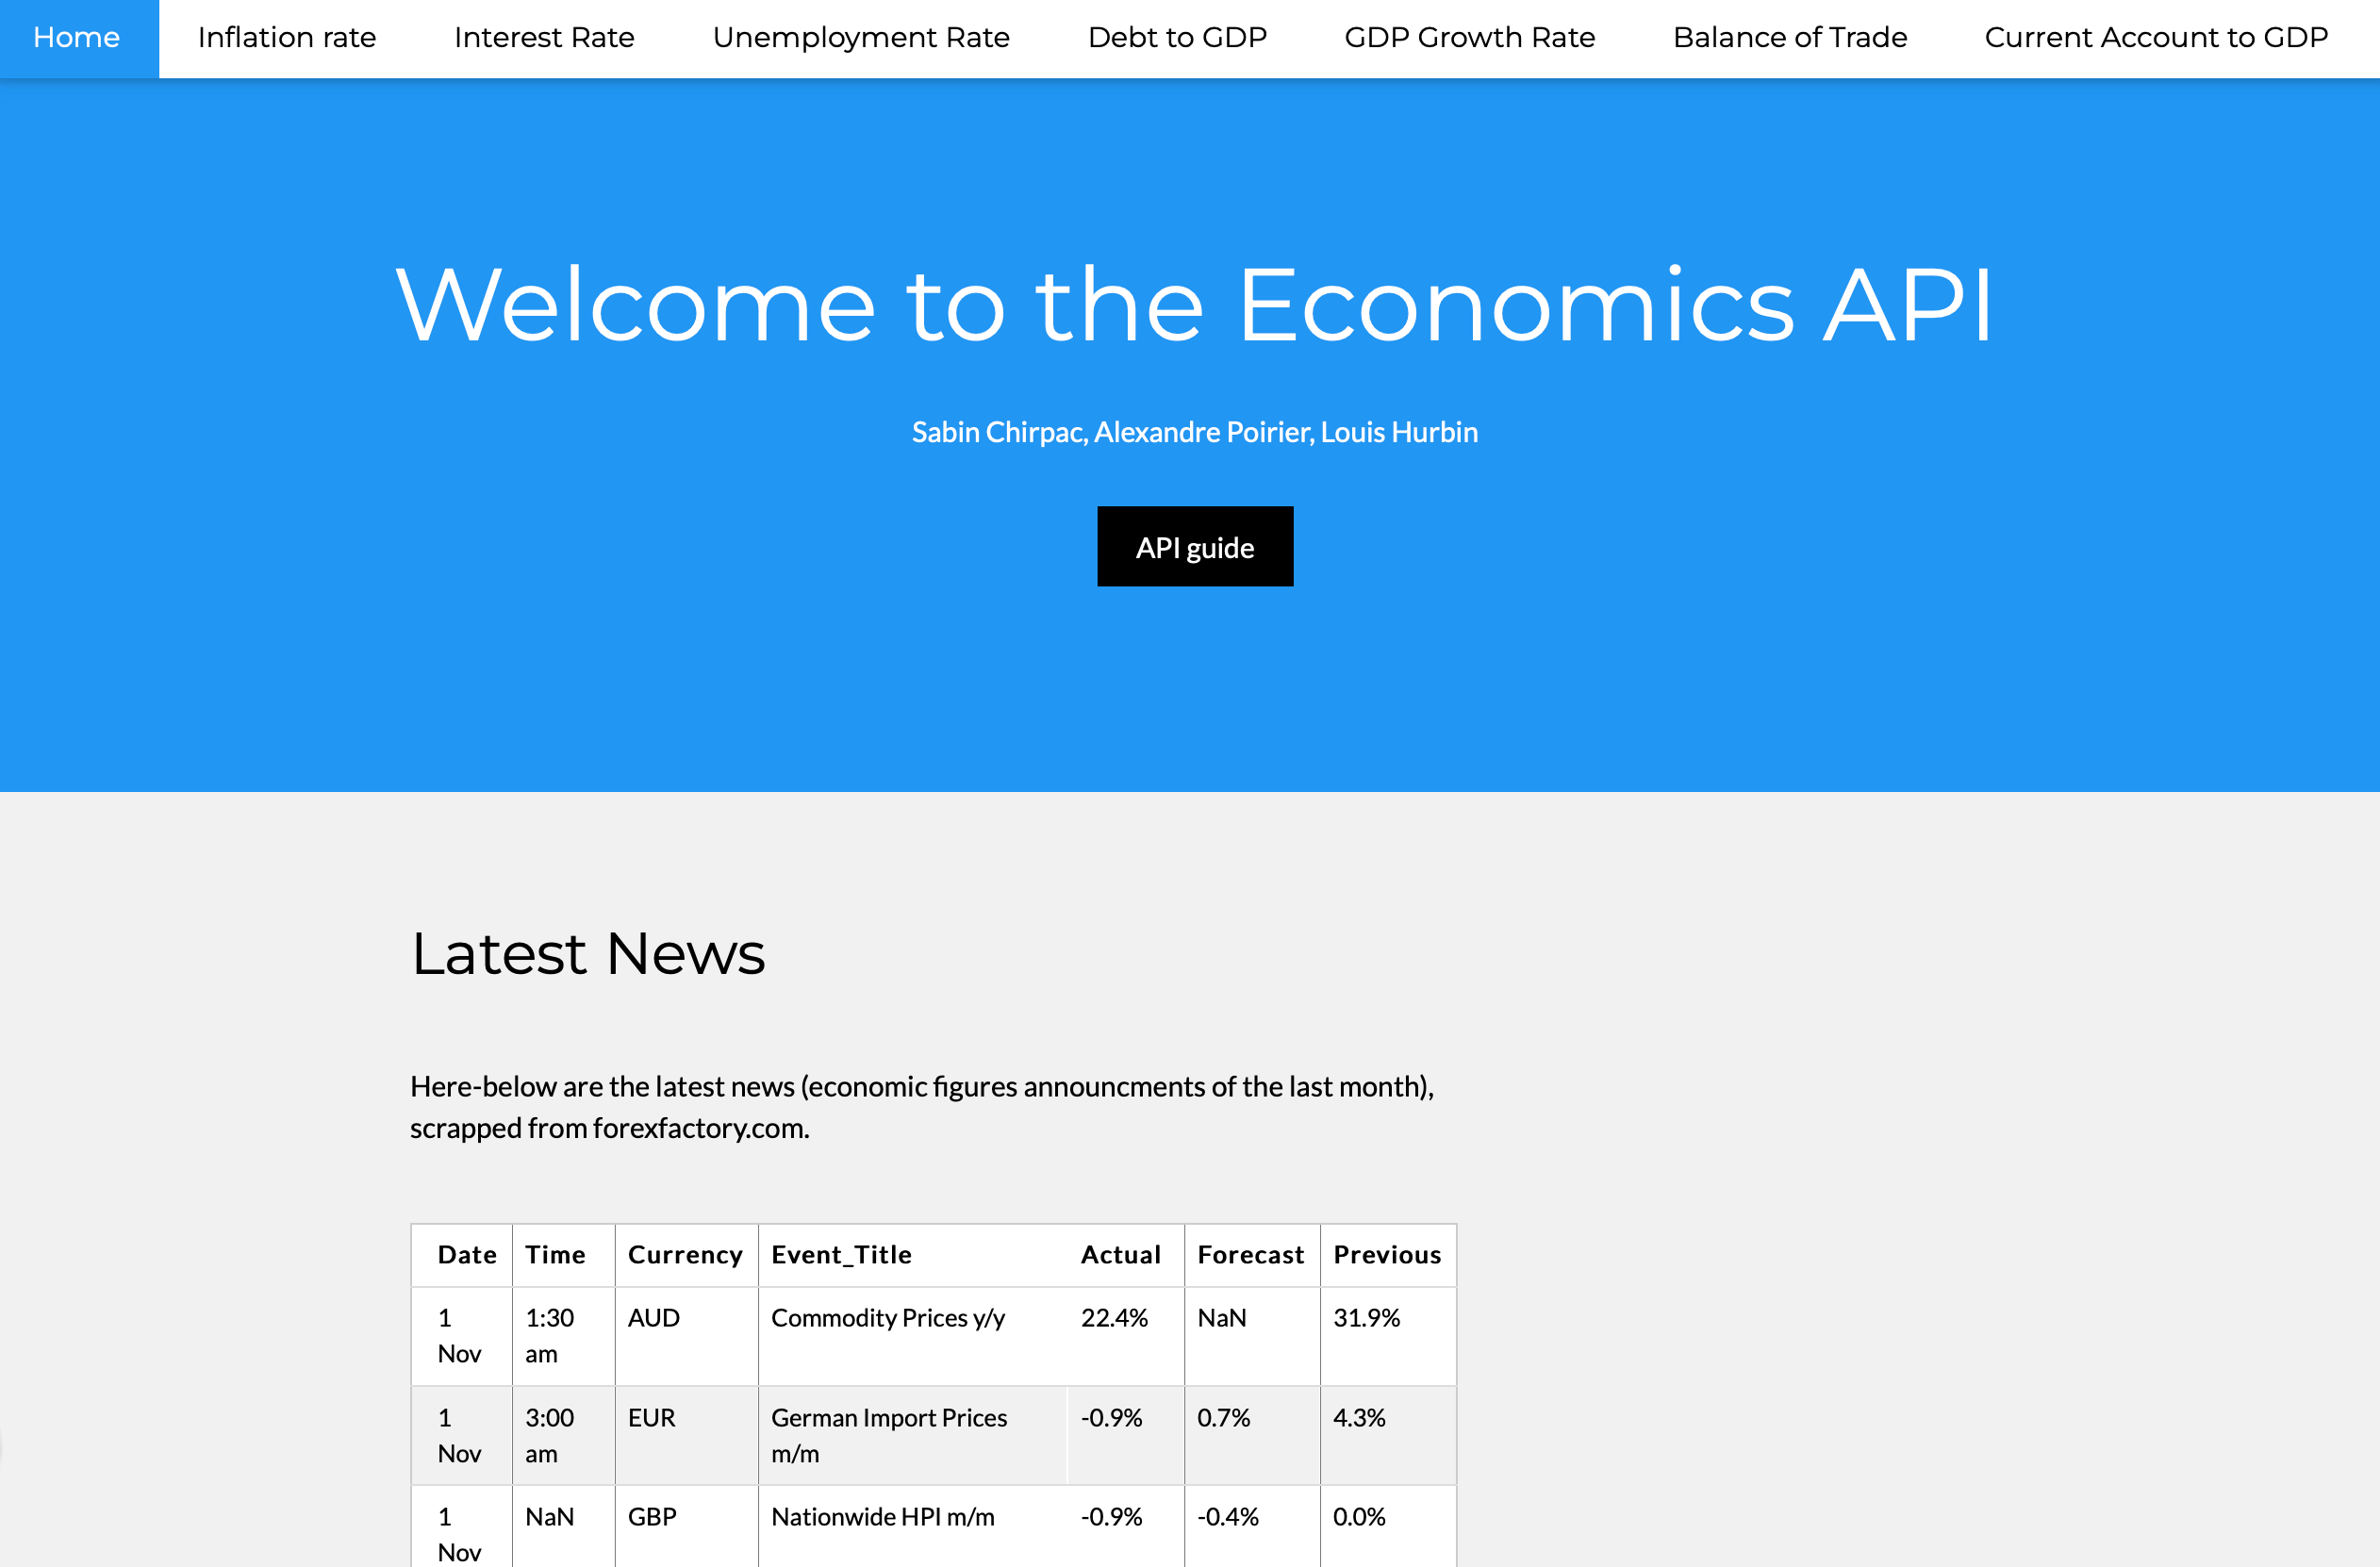

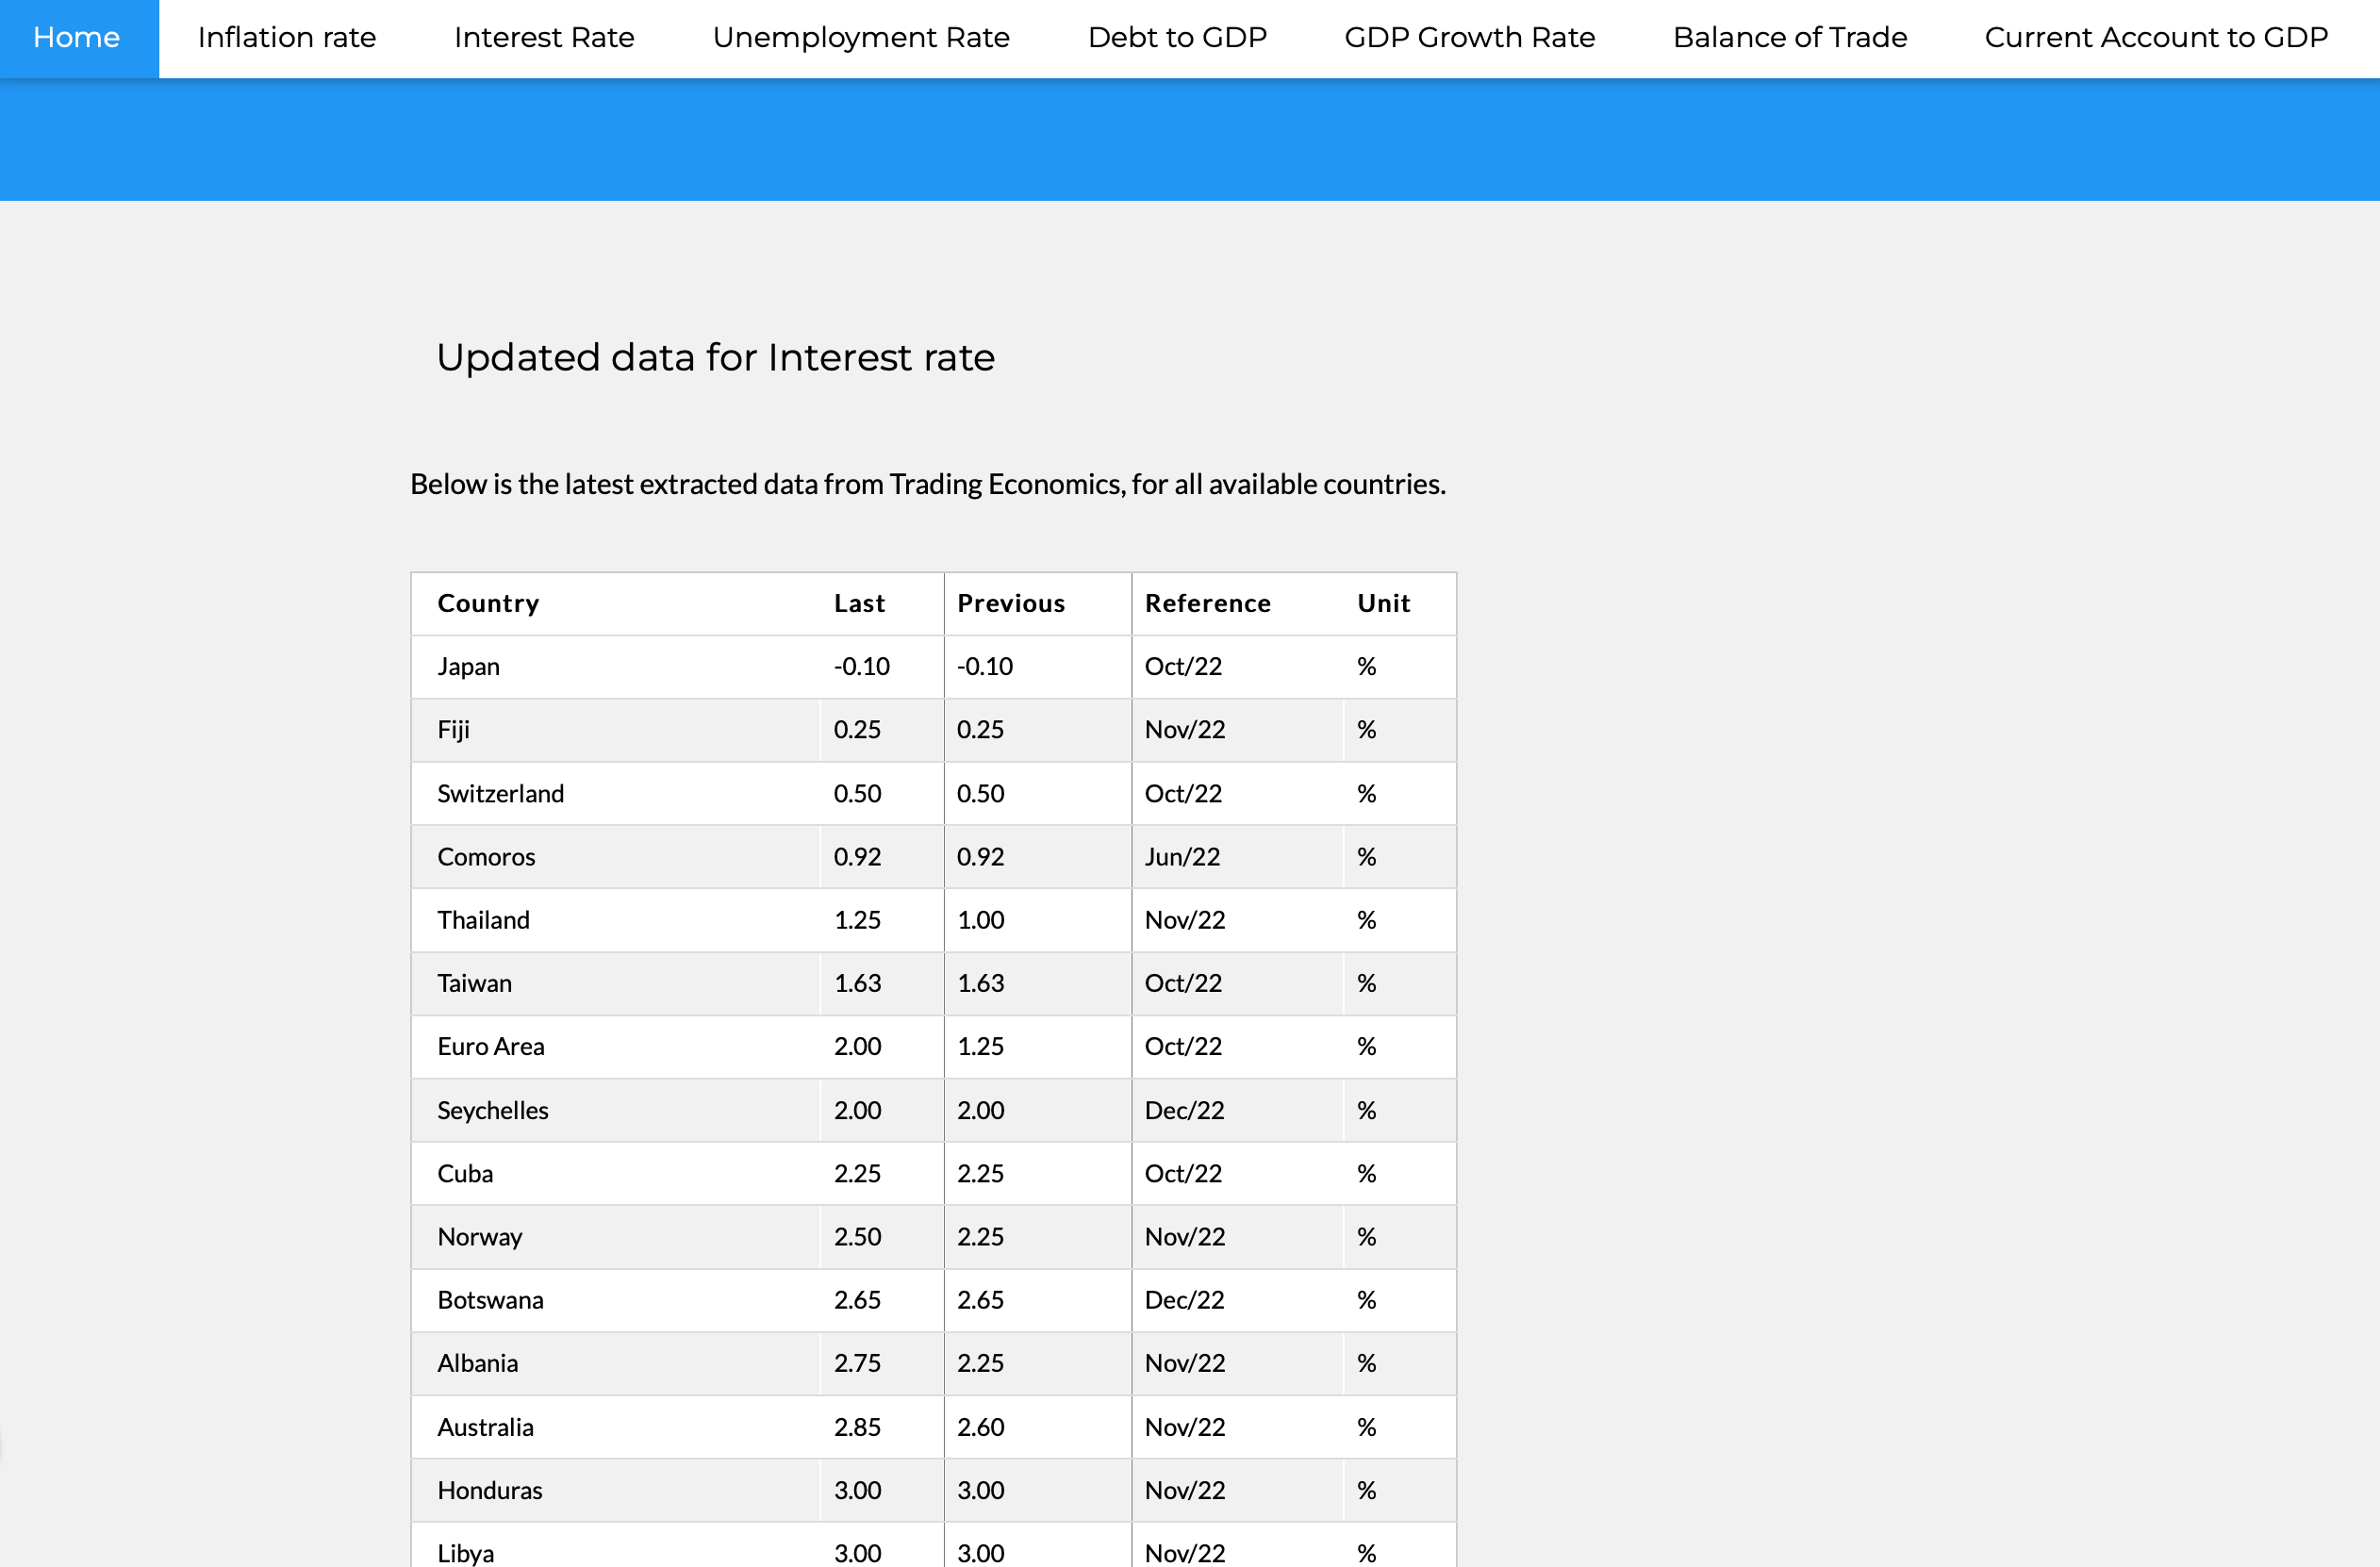

In [7]:
import pandas as pd
from flask import Flask, render_template
from flask_restful import Resource, Api, reqparse
import requests
import json

import warnings
warnings.filterwarnings("ignore")

In [8]:
#Retrieve data from the CSVs

keys = ["gdp-growth-rate", "inflation-rate", "interest-rate",
        "unemployment-rate", "government-debt-to-gdp", 
        "balance-of-trade", "current-account-to-gdp"]

data_frame_macro = []

for elem in keys:
    data_frame_macro.append(pd.read_csv(f"CSV/{elem}.csv",index_col=None))
data_frame_news = pd.read_csv("CSV/News.csv", index_col=None)
data_frame_all = pd.read_csv("CSV/all_data.csv", index_col=None)

In [9]:
# We create one resource aggregating all macro data from Trading Economics.
class all_macro_data(Resource):
    def get(self):
        data_all = data_frame_all
        df_all = {'columns': data_all.columns.tolist(), 'data' : data_all.to_dict(orient='records')}
        return df_all, 200

# We create one resource for all econommic indicators (mandatory key for each variable)

class macro_data(Resource):
    def get(self):

        parser = reqparse.RequestParser()

        #Country is the only argument of interest
        parser.add_argument('key', required=True)
        parser.add_argument('country', required = False) # If the ticker is mandatory for the request, change to True
        

        args = parser.parse_args()

        #check what is the position of the key as it determines the position of the df in the output of get_data_frame()
        key_arg = [i for i,x in enumerate(keys) if x == args['key']][0]
        
        # Args is a dictionary
        data = data_frame_macro[key_arg]
        if args['country'] is not None:
            data = data_frame_macro[key_arg][data_frame_macro[key_arg]['Country'] == args['country']]

        macro_data = {'columns': data.columns.tolist(), 'data' : data.to_dict(orient='records')}

        return macro_data, 200

# we create another resource for the "news"

class news(Resource):
    def get(self):
        data_news = data_frame_news
        news = {'columns': data_news.columns.tolist(), 'data' : data_news.to_dict(orient='records')}
        return news, 200

In [10]:
# We create a Flask app, using the html templates in the "template" folder 

app = Flask("Trading Economics API", template_folder="template")
api = Api(app)

# We add ressources defined previously to the API

api.add_resource(macro_data,'/macro-data')
api.add_resource(news, '/news')
api.add_resource(all_macro_data, '/all-data')

# We create "Routes" in order to navigate through our Website
# We retrieve the necessary data from our api using requests 
# In order to display them on the website we first need to convert them to the good format

@app.route("/")
def home():
    return render_template("home.html", tables=[data_frame_news.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/guide")
def guide():
    return render_template("guide.html")

@app.route("/all-data/visualize")
def visualize0():
    response = requests.get("http://127.0.0.1:5000/all-data")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "All Data", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/gdp-growth-rate/visualize")
def visualize1():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=gdp-growth-rate")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "GDP growth rate", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/inflation-rate/visualize")
def visualize2():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=inflation-rate")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Inflation rate", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/interest-rate/visualize")
def visualize3():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=interest-rate")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Interest rate", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/unemployment-rate/visualize")
def visualize4():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=unemployment-rate")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Unemployment rate", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/government-debt-to-gdp/visualize")
def visualize5():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=government-debt-to-gdp")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Government Debt to GDP", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/balance-of-trade/visualize")
def visualize6():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=balance-of-trade")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Balance of Trade", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

@app.route("/current-account-to-gdp/visualize")
def visualize7():
    response = requests.get("http://127.0.0.1:5000/macro-data?key=current-account-to-gdp")
    json_data = response.json()
    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
    return render_template("tables.html", table_name = "Current Account to GDP", tables=[df.to_html(classes='w3-table w3-table-all', index = False)], titles=None)

In [11]:
# We can launch the website by running this cell

app.run()

 * Serving Flask app "Trading Economics API" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Dec/2022 19:30:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:31] "GET /all-data HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:31] "GET /all-data/visualize HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:36] "GET /macro-data?key=current-account-to-gdp HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:36] "GET /current-account-to-gdp/visualize HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:39] "GET /macro-data?key=gdp-growth-rate HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:39] "GET /gdp-growth-rate/visualize HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:42] "GET /guide HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:30:56] "GET / HTTP/1.1" 200 -
